# Packages

In [1]:
import os
import pandas as pd

import ee
import geemap
import fiona
# import cartopy.crs as ccrs
from geemap import cartoee
from geemap.datasets import DATA

import whiteboxgui
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cartopy is not installed. Please see https://scitools.org.uk/cartopy/docs/latest/installing.html#installing for instructions on how to install cartopy.

The easiest way to install cartopy is using conda: conda install -c conda-forge cartopy


# Geemap basics

In [2]:
ee.Authenticate()
ee.Initialize()

In [3]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [4]:
# Specfy the center (lat, lon) and zoom level
Map = geemap.Map(center = (40, -100), zoom = 4, lite_mode = True)
Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Add Basemaps

In [5]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [6]:
Map.add_basemap('OpenTopoMap')

In [7]:
for basemap in geemap.basemaps.keys():
    print(basemap)

OpenStreetMap
Esri.WorldStreetMap
Esri.WorldImagery
Esri.WorldTopoMap
FWS NWI Wetlands
FWS NWI Wetlands Raster
NLCD 2021 CONUS Land Cover
NLCD 2019 CONUS Land Cover
NLCD 2016 CONUS Land Cover
NLCD 2013 CONUS Land Cover
NLCD 2011 CONUS Land Cover
NLCD 2008 CONUS Land Cover
NLCD 2006 CONUS Land Cover
NLCD 2004 CONUS Land Cover
NLCD 2001 CONUS Land Cover
USGS NAIP Imagery
USGS NAIP Imagery False Color
USGS NAIP Imagery NDVI
USGS Hydrography
USGS 3DEP Elevation
ESA Worldcover 2020
ESA Worldcover 2020 S2 FCC
ESA Worldcover 2020 S2 TCC
ESA Worldcover 2021
ESA Worldcover 2021 S2 FCC
ESA Worldcover 2021 S2 TCC
BasemapAT.basemap
BasemapAT.grau
BasemapAT.highdpi
BasemapAT.orthofoto
BasemapAT.overlay
BasemapAT.surface
BasemapAT.terrain
CartoDB.DarkMatter
CartoDB.DarkMatterNoLabels
CartoDB.DarkMatterOnlyLabels
CartoDB.Positron
CartoDB.PositronNoLabels
CartoDB.PositronOnlyLabels
CartoDB.Voyager
CartoDB.VoyagerLabelsUnder
CartoDB.VoyagerNoLabels
CartoDB.VoyagerOnlyLabels
CyclOSM
Esri.AntarcticBasema

Without coding:

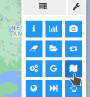

In [8]:
# Without coding
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Add WMS and XYZ tile layers

In [9]:
Map = geemap.Map()

url = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}'
Map.add_tile_layer(url, name='Google Terrain', attribution='Google')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [10]:
naip_url = 'https://services.nationalmap.gov/arcgis/services/USGSNAIPImagery/ImageServer/WMSServer?'
Map.add_wms_layer(
    url=naip_url, layers='0', name='NAIP Imagery', format='image/png', shown=True
)

In [11]:
Map = geemap.Map()
Map.user_rois.getInfo()

{'type': 'FeatureCollection', 'columns': {}, 'features': []}

## Convert GEE Javascript to Python

In [12]:
js_snippet = """
// Load an image.
var image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318');

// Define the visualization parameters.
var vizParams = {
  bands: ['B5', 'B4', 'B3'],
  min: 0,
  max: 0.5,
  gamma: [0.95, 1.1, 1]
};

// Center the map and display the image.
Map.setCenter(-122.1899, 37.5010, 10); // San Francisco Bay
Map.addLayer(image, vizParams, 'false color composite');

"""

In [13]:
geemap.js_snippet_to_py(
    js_snippet, add_new_cell = True, import_ee = True, import_geemap = True, show_map = True
)

In [ ]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

In [14]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [15]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [16]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [17]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [18]:
import ee
import geemap

m = geemap.Map()
import geemap

m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [19]:
# Now it is below!!!


m = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
}

# Center the map and display the image.
m.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
m.addLayer(image, vizParams, 'False color composite')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Earth Engine Datasets

In [20]:
Map = geemap.Map()

# Add earth Engine datasets
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image('ESA/GLOBCOVER_L4_200901_200912_V2_3').select('landcover')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

# Add EE layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(
    landsat7,
    {'bands': ['B4', 'B3', 'B2'],
     "min": 20,
     "max": 200,
     "gamma": 1.5},
     "Landsat 7"
)
Map.addLayer(states, {}, "US States")

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Search the EE Data Catalog

In [21]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [22]:
dem = ee.Image('CGIAR/SRTM90_V4')
Map.addLayer(dem, {}, 'CGIAR/SRTM90_V4')

In [23]:
vis_params = {
    "min": 0,
    "max": 4000,
    "palette": ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

Map.addLayer(dem, vis_params, 'DEM')

## Use the datasets module

In [24]:
Map = geemap.Map()

dem = ee.Image(DATA.USGS_SRTMGL1_003)

vis_params = {
    "min": 0,
    "max": 4000,
    "palette": ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

Map.addLayer(dem, vis_params, 'SRTM DEM')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Use the Inspector tool

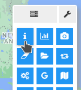

In [25]:
Map = geemap.Map()

# Add Earth Engine datasets
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add Earth Engine layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(
    landsat7,
    {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 1.5},
    'Landsat 7',
)
Map.addLayer(states, {}, "US States")

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

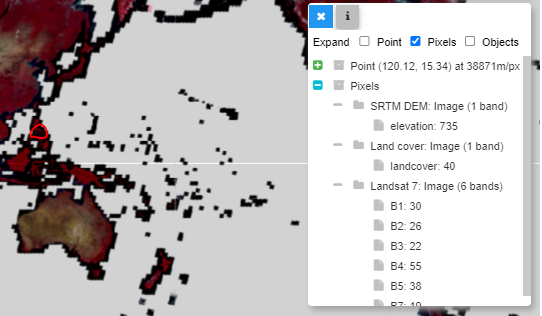

# Data Visualization

## Use the Plotting tool

In [26]:
Map = geemap.Map()

landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'],
    'gamma': 1.4
}
Map.addLayer(landsat7, landsat_vis, "Landsat")

In [27]:
hyperion = ee.ImageCollection('EO1/HYPERION').filter(
    ee.Filter.date('2016-01-01', '2017-03-01')
)

hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5
}

Map.addLayer(hyperion, hyperion_vis, "Hyperion")

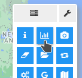

In [28]:
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

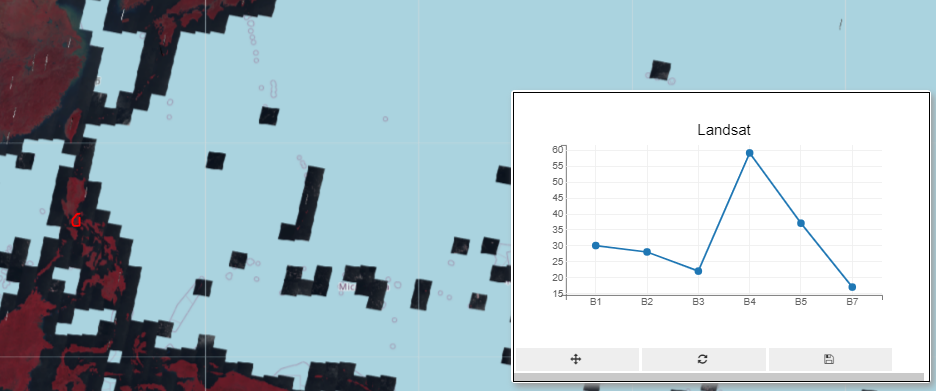

## Change layer opacity

In [29]:
Map = geemap.Map(center = (40, -100), zoom = 4)

dem = ee.Image('USGS/SRTMGL1_003')
states = ee.FeatureCollection('TIGER/2018/States')

vis_params = {
    'min': 0,
    "max": 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map.addLayer(states, {}, 'US States', True)

In [30]:
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

## Visualize raster and vector data

In [31]:
Map = geemap.Map(center=(40, -100), zoom=4)

# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM_DEM', True, 1)
Map.addLayer(landsat7,
             {
                 "bands": ['B4', 'B3', 'B2'],
                 'min': 20,
                 'max': 200,
                 'gamma': 2,
             })

In [32]:
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [33]:
# Back to normal map
Map = geemap.Map()

states = ee.FeatureCollection('TIGER/2018/States')
Map.addLayer(states, {}, 'US States')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [34]:
# Add styled vector
vis_params = {
    'color': '000000',
    'colorOpacity': 1,
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid',
    'fillColorOpacity': 0.66
}

palette = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']

Map.add_styled_vector(
    states, column = 'NAME', palette = palette, layer_name = 'Styled Vector', **vis_params
)

## Add a legend

In [35]:
legends = geemap.builtin_legends
for legend in legends:
    print(legend)

NLCD
ESA_WorldCover
ESRI_LandCover
ESRI_LandCover_TS
Dynamic_World
NWI
MODIS/051/MCD12Q1
MODIS/006/MCD12Q1
GLOBCOVER
JAXA/PALSAR
Oxford
AAFC/ACI
COPERNICUS/CORINE/V20/100m
COPERNICUS/Landcover/100m/Proba-V/Global
USDA/NASS/CDL
ALOS_landforms


In [36]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
landcover = ee.Image('USGS/NLCD/NLCD2016').select('landcover')
Map.addLayer(landcover, {}, 'NLCD Land Cover')
Map.add_legend(builtin_legend = 'NLCD')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [37]:
# Own legend
Map = geemap.Map()

legend_dict = {
    '11 Open Water': '466b9f',
    '12 Perennial Ice/Snow': 'd1def8',
    '21 Developed, Open Space': 'dec5c5',
    '22 Developed, Low Intensity': 'd99282',
    '23 Developed, Medium Intensity': 'eb0000',
    '24 Developed High Intensity': 'ab0000',
    '31 Barren Land (Rock/Sand/Clay)': 'b3ac9f',
    '41 Deciduous Forest': '68ab5f',
    '42 Evergreen Forest': '1c5f2c',
    '43 Mixed Forest': 'b5c58f',
    '51 Dwarf Scrub': 'af963c',
    '52 Shrub/Scrub': 'ccb879',
    '71 Grassland/Herbaceous': 'dfdfc2',
    '72 Sedge/Herbaceous': 'd1d182',
    '73 Lichens': 'a3cc51',
    '74 Moss': '82ba9e',
    '81 Pasture/Hay': 'dcd939',
    '82 Cultivated Crops': 'ab6c28',
    '90 Woody Wetlands': 'b8d9eb',
    '95 Emergent Herbaceous Wetlands': '6c9fb8',
}

landcover = ee.Image('USGS/NLCD/NLCD2016').select('landcover')
Map.addLayer(landcover, {}, 'NLCD Land Cover')

Map.add_legend(legend_title = "NLCD Land Cover Classification", legend_dict = legend_dict)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Add colorbar

In [38]:
Map = geemap.Map()

dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM')

colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

Map.add_colorbar(vis_params, label = 'Elevation (m)', layer_name = 'SRTM DEM')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [39]:
# Change orientation
Map.add_colorbar(
    vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical"
)

In [40]:
# Add transparency
Map.add_colorbar(
    vis_params,
    label = 'Elevation (m)',
    layer_name = 'SRTM DEM',
    orientation = 'vertical',
    transparent_bg = True
)

In [41]:
# Add discreteness
Map.add_colorbar(
    vis_params,
    label = 'Elevation (m)',
    layer_name = 'SRTM DEM',
    orientation = 'vertical',
    transparent_bg = True,
    discrete = True
)

## Create a split-panel map

In [42]:
Map = geemap.Map()
Map.split_map(left_layer = 'HYBRID', right_layer = 'TERRAIN')
Map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [43]:
Map = geemap.Map()
Map.split_map(
    left_layer = 'NLCD 2016 CONUS Land Cover',
    right_layer = 'NLCD 2001 CONUS Land Cover',
)
Map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [44]:
# Can also add searched images
nlcd_2001 = ee.Image('USGS/NLCD/NLCD2001').select('landcover')
nlcd_2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2016, {}, 'NLCD 2016')

Map = geemap.Map()
Map.split_map(left_layer, right_layer)
Map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

## Create linked maps

In [45]:
image = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterDate('2020-06-01', '2020-06-30')
    .map(lambda img: img.divide(10000))
    .median()
)

vis_params = [
    {
        'bands': ['B4', 'B3', 'B2'],
        'min': 0,
        'max': 0.3,
        'gamma': 1.3
    },
    {
        'bands': ['B8', 'B11', 'B4'],
        'min': 0,
        'max': 0.3,
        'gamma': 1.3
    },
    {
        'bands': ['B8', 'B4', 'B3'],
        'min': 0,
        'max': 0.3,
        'gamma': 1.3
    },
    {
        'bands': ['B12', 'B11', 'B4'],
        'min': 0,
        'max': 0.3,
        'gamma': 1.3
    }
]

labels = [
    'Natural Color (B4/B3/B2)',
    'Land/Water (B8/B11/B4)',
    'Color Infrared (B8/B4/B3)',
    'Vegetation (B12/B11/B4)' 
]

geemap.linked_maps(
    rows = 2,
    cols = 2,
    height = '400px',
    center = [14.599512, 120.984222],
    zoom = 12,
    ee_objects = [image],
    vis_params = vis_params,
    labels = labels,
    label_position = 'topright'
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Timelapse

In [46]:
geemap.show_youtube('https://youtu.be/mA21Us_3m28')

Output(layout=Layout(width='815px'))

## Time-series composites

In [47]:
geemap.show_youtube('https://youtu.be/kEltQkNia6o')

Output(layout=Layout(width='815px'))

# Data Analysis

## Descriptive Statistics

In [48]:
Map = geemap.Map()

centroid = ee.Geometry.Point([-122.4439, 37.7538])
image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
    .filterBounds(centroid)\
    .first()

vis = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(centroid, 8)
Map.addLayer(image, vis, 'Landsat-8')
Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

In [49]:
image.propertyNames().getInfo()

['IMAGE_QUALITY_TIRS',
 'CLOUD_COVER',
 'system:id',
 'EARTH_SUN_DISTANCE',
 'LANDSAT_ID',
 'system:footprint',
 'system:version',
 'CLOUD_COVER_LAND',
 'GEOMETRIC_RMSE_MODEL',
 'SR_APP_VERSION',
 'SATELLITE',
 'SOLAR_AZIMUTH_ANGLE',
 'IMAGE_QUALITY_OLI',
 'system:time_end',
 'WRS_PATH',
 'system:time_start',
 'SENSING_TIME',
 'ESPA_VERSION',
 'SOLAR_ZENITH_ANGLE',
 'WRS_ROW',
 'GEOMETRIC_RMSE_MODEL_Y',
 'LEVEL1_PRODUCTION_DATE',
 'GEOMETRIC_RMSE_MODEL_X',
 'system:asset_size',
 'PIXEL_QA_VERSION',
 'system:index',
 'system:bands',
 'system:band_names']

In [50]:
image.get('CLOUD_COVER').getInfo()

0.05

In [51]:
props = geemap.image_props(image)
props.getInfo()

{'CLOUD_COVER': 0.05,
 'CLOUD_COVER_LAND': 0.06,
 'EARTH_SUN_DISTANCE': 1.001791,
 'ESPA_VERSION': '2_23_0_1b',
 'GEOMETRIC_RMSE_MODEL': 6.678,
 'GEOMETRIC_RMSE_MODEL_X': 4.663,
 'GEOMETRIC_RMSE_MODEL_Y': 4.78,
 'IMAGE_DATE': '2013-04-09',
 'IMAGE_QUALITY_OLI': 9,
 'IMAGE_QUALITY_TIRS': 9,
 'LANDSAT_ID': 'LC08_L1TP_044034_20130409_20170310_01_T1',
 'LEVEL1_PRODUCTION_DATE': 1489126619000,
 'NOMINAL_SCALE': 30,
 'PIXEL_QA_VERSION': 'generate_pixel_qa_1.6.0',
 'SATELLITE': 'LANDSAT_8',
 'SENSING_TIME': '2013-04-09T18:46:34.7579070Z',
 'SOLAR_AZIMUTH_ANGLE': 142.742508,
 'SOLAR_ZENITH_ANGLE': 34.973495,
 'SR_APP_VERSION': 'LaSRC_1.3.0',
 'WRS_PATH': 44,
 'WRS_ROW': 34,
 'system:asset_size': '558.682087 MB',
 'system:band_names': ['B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B10',
  'B11',
  'sr_aerosol',
  'pixel_qa',
  'radsat_qa'],
 'system:id': 'LANDSAT/LC08/C01/T1_SR/LC08_044034_20130409',
 'system:index': 'LC08_044034_20130409',
 'system:time_end': '2013-04-09 18:46:34',


In [52]:
stats = geemap.image_stats(image, scale = 90)
stats.getInfo()

{'max': {'B1': 7624,
  'B10': 3155,
  'B11': 3127,
  'B2': 8471,
  'B3': 9778,
  'B4': 10679,
  'B5': 11606,
  'B6': 13054,
  'B7': 12327,
  'pixel_qa': 480,
  'radsat_qa': 254,
  'sr_aerosol': 228},
 'mean': {'B1': 373.1098468094288,
  'B10': 2933.4637979167587,
  'B11': 2916.2783879093463,
  'B2': 427.40213139234174,
  'B3': 614.9744637045824,
  'B4': 591.3781773385491,
  'B5': 1954.1344781864764,
  'B6': 1472.071307222312,
  'B7': 996.8232780577415,
  'pixel_qa': 322.84337032413475,
  'radsat_qa': 0.00019878780091270898,
  'sr_aerosol': 87.74885862483129},
 'min': {'B1': -1432,
  'B10': 2759,
  'B11': 2702,
  'B2': -1129,
  'B3': -345,
  'B4': -403,
  'B5': 35,
  'B6': 10,
  'B7': 5,
  'pixel_qa': 322,
  'radsat_qa': 0,
  'sr_aerosol': 8},
 'std': {'B1': 201.9355685609457,
  'B10': 67.57460806939051,
  'B11': 63.85549758560136,
  'B2': 230.81296623126636,
  'B3': 296.8097076885089,
  'B4': 393.63764571402265,
  'B5': 1202.7937141588027,
  'B6': 926.420271742664,
  'B7': 729.02337115

## Zonal Statistics

In [53]:
Map = geemap.Map()

# Add EE dataset
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters
dem_vis = {
    'min': 0,
    'max': 4000,
    'palette':['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add EE DEM to map
Map.addLayer(dem, dem_vis, 'SRTM DEM')

# Add Landsat data to map
landsat = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat, landsat_vis, 'LE7_TOA_5YEAR/1999_2003')

states = ee.FeatureCollection('TIGER/2018/States')
Map.addLayer(states, {}, 'US States')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [54]:
out_dir = os.path.expanduser('~/Downloads')
out_dem_stats = os.path.join(out_dir, 'dem_stats.csv')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics types: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, SVARIANCE, SUM
geemap.zonal_stats(dem, states, out_dem_stats, stat_type = 'MEAN', scale = 1000)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\dem_stats.csv


In [55]:
# Check
dem_stats = pd.read_csv(r'C:\Users\gilramolete\Downloads\dem_stats.csv')
dem_stats

,mean,STATENS,GEOID,AWATER,LSAD,STUSPS,STATEFP,FUNCSTAT,INTPTLAT,DIVISION,REGION,NAME,INTPTLON,MTFCC,ALAND,system:index
0,15.149698,1802710,78,1550236201,0,VI,78,A,18.326748,0,9,United States Virgin Islands,-64.971251,G4000,348021896,00000000000000000022
1,14.699425,1779809,69,4644252461,0,MP,69,A,14.936784,0,9,Commonwealth of the Northern Mariana Islands,145.601021,G4000,472292529,00000000000000000023
2,36.152070,1802705,66,934337453,0,GU,66,A,13.438289,0,9,Guam,144.772949,G4000,543555840,00000000000000000024
3,26.543959,1802701,60,1307243754,0,AS,60,A,-14.267159,0,9,American Samoa,-170.668267,G4000,197759063,00000000000000000029
4,151.547035,1779808,72,4922382562,0,PR,72,A,18.217648,0,9,Puerto Rico,-66.410799,G4000,8868896030,00000000000000000031
5,57.769871,1219835,44,1323670487,0,RI,44,A,41.597419,1,1,Rhode Island,-71.527272,G4000,2677779902,00000000000000000005
6,347.549097,1779794,33,1026675248,0,NH,33,A,43.672691,1,1,New Hampshire,-71.584315,G4000,23189413166,00000000000000000007
7,373.218511,1779802,50,1030416650,0,VT,50,A,44.068577,1,1,Vermont,-72.669184,G4000,23874175944,00000000000000000009
8,133.111310,1779780,9,1815617571,0,CT,9,A,41.579864,1,1,Connecticut,-72.746657,G4000,12542497068,0000000000000000000a
9,217.098618,1779787,23,11746549764,0,ME,23,A,45.409284,1,1,Maine,-68.666616,G4000,79887426037,00000000000000000025


In [56]:
out_landsat_stats = os.path.join(out_dir, 'landsat_stats.csv')
geemap.zonal_stats(
    landsat, states, out_landsat_stats, stat_type = 'SUM', scale = 1000
)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\landsat_stats.csv


In [57]:
landsat_stats = pd.read_csv(r'C:/Users/gilramolete/Downloads/landsat_stats.csv')
landsat_stats

,B1,B2,B3,B4,B5,B6_VCID_2,B7,STATENS,GEOID,AWATER,...,STATEFP,FUNCSTAT,INTPTLAT,DIVISION,REGION,NAME,INTPTLON,MTFCC,ALAND,system:index
0,6.300393e+04,4.356764e+04,3.197985e+04,4.280881e+04,2.998599e+04,3.928458e+05,1.811574e+04,1802710,78,1550236201,...,78,A,18.326748,0,9,United States Virgin Islands,-64.971251,G4000,348021896,00000000000000000022
1,1.238334e+05,7.464083e+04,5.024136e+04,7.001980e+04,3.914254e+04,8.566081e+05,2.215766e+04,1779809,69,4644252461,...,69,A,14.936784,0,9,Commonwealth of the Northern Mariana Islands,145.601021,G4000,472292529,00000000000000000023
2,4.381525e+04,3.073998e+04,2.187886e+04,5.189767e+04,2.922216e+04,2.987625e+05,1.416122e+04,1802705,66,934337453,...,66,A,13.438289,0,9,Guam,144.772949,G4000,543555840,00000000000000000024
3,4.029172e+04,2.544361e+04,1.733692e+04,2.901353e+04,1.363273e+04,2.745783e+05,7.720345e+03,1802701,60,1307243754,...,60,A,-14.267159,0,9,American Samoa,-170.668267,G4000,197759063,00000000000000000029
4,4.136275e+05,3.259721e+05,2.343742e+05,7.361979e+05,4.126988e+05,2.868673e+06,1.894587e+05,1779808,72,4922382562,...,72,A,18.217648,0,9,Puerto Rico,-66.410799,G4000,8868896030,00000000000000000031
5,1.429317e+05,1.090466e+05,7.706529e+04,2.619357e+05,1.400421e+05,1.019593e+06,6.330753e+04,1219835,44,1323670487,...,44,A,41.597419,1,1,Rhode Island,-71.527272,G4000,2677779902,00000000000000000005
6,8.100202e+05,6.665046e+05,4.759974e+05,2.216857e+06,1.083016e+06,6.316924e+06,4.468514e+05,1779794,33,1026675248,...,33,A,43.672691,1,1,New Hampshire,-71.584315,G4000,23189413166,00000000000000000007
7,8.582936e+05,7.133831e+05,5.023741e+05,2.493948e+06,1.200986e+06,6.541818e+06,4.870126e+05,1779802,50,1030416650,...,50,A,44.068577,1,1,Vermont,-72.669184,G4000,23874175944,00000000000000000009
8,5.077611e+05,4.054808e+05,3.153169e+05,1.083291e+06,6.316737e+05,3.646287e+06,2.764534e+05,1779780,9,1815617571,...,9,A,41.579864,1,1,Connecticut,-72.746657,G4000,12542497068,0000000000000000000a
9,3.177429e+06,2.539492e+06,1.737219e+06,8.027634e+06,3.728487e+06,2.457378e+07,1.536538e+06,1779787,23,11746549764,...,23,A,45.409284,1,1,Maine,-68.666616,G4000,79887426037,00000000000000000025


## Zonal statistics by group

In [58]:
Map = geemap.Map()

dataset = ee.Image('USGS/NLCD/NLCD2016')
landcover = ee.Image(dataset.select('landcover'))
Map.addLayer(landcover, {}, 'NLCD 2016')

states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, 'US States')
Map.add_legend(builtin_legend='NLCD')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [59]:
nlcd_stats = os.path.join(out_dir, 'nlcd_stats.csv')

# statistics_type can be either 'SUM' or 'PERCENTAGE'
# The denominator can be used to convert square meters to other areal units, like square kilometers
geemap.zonal_stats_by_group(
    landcover,
    states,
    nlcd_stats,
    stat_type = 'SUM',
    denominator = 1000000,
    decimal_places = 4
)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\nlcd_stats.csv


In [60]:
nlcd_stats = pd.read_csv(r'C:/Users/gilramolete/Downloads/nlcd_stats.csv')
nlcd_stats

,Class_81,Class_71,Class_82,Class_95,Class_41,Class_52,Class_31,Class_42,Class_21,Class_43,...,STATEFP,FUNCSTAT,INTPTLAT,DIVISION,REGION,NAME,INTPTLON,MTFCC,ALAND,system:index
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,78,A,18.326748,0,9,United States Virgin Islands,-64.971251,G4000,348021896,00000000000000000022
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,69,A,14.936784,0,9,Commonwealth of the Northern Mariana Islands,145.601021,G4000,472292529,00000000000000000023
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,66,A,13.438289,0,9,Guam,144.772949,G4000,543555840,00000000000000000024
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,60,A,-14.267159,0,9,American Samoa,-170.668267,G4000,197759063,00000000000000000029
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,72,A,18.217648,0,9,Puerto Rico,-66.410799,G4000,8868896030,00000000000000000031
5,76.5984,38.3878,18.0196,27.4491,917.2636,8.8481,31.4021,103.0391,117.7362,427.3831,...,44,A,41.597419,1,1,Rhode Island,-71.527272,G4000,2677779902,00000000000000000005
6,732.3694,203.3044,70.6857,84.4804,5251.0007,635.7210,100.5248,4415.2883,632.7517,8650.7604,...,33,A,43.672691,1,1,New Hampshire,-71.584315,G4000,23189413166,00000000000000000007
7,3119.9050,151.5879,441.6829,117.1580,9640.6305,187.6868,36.7636,3076.3383,444.5355,5274.5976,...,50,A,44.068577,1,1,Vermont,-72.669184,G4000,23874175944,00000000000000000009
8,441.4846,61.1033,211.6969,76.8316,6515.6419,21.0301,33.7018,139.5366,1039.8059,1434.1948,...,9,A,41.579864,1,1,Connecticut,-72.746657,G4000,12542497068,0000000000000000000a
9,2220.0183,1781.4964,1040.2398,743.2601,12547.3125,3587.9086,174.4165,17458.9146,1101.7209,27999.2253,...,23,A,45.409284,1,1,Maine,-68.666616,G4000,79887426037,00000000000000000025


## Unsupervised classification

The `ee.Clusterer` package handles unsupervised classification in EE. These algorithms are currently based on Weka.

Clusterers are used in the same manner as classifiers in EE. The general workflow for clustering is:
1. Assemble features with numeric properties in which to find clusters
2. Instantiate a clusterer. Set its parameters if necessary.
3. Train the clusterer using the training data.
4. Apply the clusterer to an image or feature collection.
5. Label the clusters.

The training data is a `FeatureCollection` with properties that will be input to the clusterer. Unlike classifiers, there is no input class value for a `Clusterer`. Like classifiers though, the data for the train and apply steps are expected to have the same number of values. When a trained clusterer is applied to an image or table, it assigns an integer cluster ID to each pixel or feature.

### Add data to the map

In [61]:
Map = geemap.Map()

point = ee.Geometry.Point([-87.7719, 41.8799])

image = (
    ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
        .filterBounds(point)\
        .filterDate('2019-01-01','2019-12-31')\
        .sort('CLOUD_COVER')\
        .first()\
        .select('B[1-7]')
)

vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B5', 'B4', 'B3']
}

Map.centerObject(point, 8)
Map.addLayer(image, vis_params, 'Landsat-8')
Map

Map(center=[41.8799, -87.7719], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

### Make a training dataset

There are several ways to create a region for generating the training set:
- Draw a shape (e.g. rectangle) on the map and the use `region = Map.user_roi`
- Define a geometry, such as `region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])`
- Create a buffer zone around a point, such as `region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)`
- If you don't define a region, it will use the image footprint by default

In [62]:
training = image.sample(
    **{
        # 'region': region,
        'scale': 30,
        'numPixels': 5000,
        'seed': 0,
        'geometries': True, # Set this to False to ignore geometries
    }
)

Map.addLayer(training, {}, 'training', False)

### Train the clusterer and classify the image

In [63]:
# instantiate the clusterer and train it
n_clusters = 5
clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(training)
clusterer

In [64]:
# Cluster the input using the trained clusterer
result = image.cluster(clusterer)

# Display the clusters with random colors
Map.addLayer(result.randomVisualizer(), {}, 'clusters')
Map

Map(center=[41.8799, -87.7719], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

### Label the clusters and visualize the result

In [65]:
legend_keys = ['One', 'Two', 'Three', 'Four', 'etc']
legend_colors = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3']

# Reclassify the map
result = result.remap([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

Map.addLayer(
    result, {'min': 1, 'max': 5, 'palette': legend_colors}, 'Labelled clusters'
)
Map.add_legend(
    legend_keys = legend_keys, legend_colors = legend_colors, position = 'bottomright'
)

In [66]:
print('Change layer opacity:')
cluster_layer = Map.layers[-1]
cluster_layer.interact(opacity = (0, 1, 0.1))

Map

Change layer opacity:


Map(center=[41.8799, -87.7719], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

### Export the result

In [67]:
out_file = os.path.join(out_dir, 'cluster.tif')
geemap.ee_export_image(result, filename = out_file, scale = 90)

# # For drive
# geemap.ee_export_image_to_drive(result, description='clusters', folder='export', scale=90)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\cluster.tif


## Supervised classification

The `Classifier` package handles supervised classification by traditional ML algorithms running in EE. These classifier include CART, RandomForest, NaiveBayes, and SVM. The general workflow for classifcation is:
1. Collect training data. Assemble features which have a property that stores the known class label and properties storing numeric values for the predictors.
2. Instantiate a classifier. Set its parameters if necessary.
3. Train the classifier using the training data.
4. Classify an image or feature collection.
5. Estimate the classification error with independent validation data.

The training data is a `FeatureCollection` with a property storing the class label and properties storing predictor variables. Class labels should be consecutive integers starting from 0. If necessary, use `remap()` to convert class values to consecutive integers. The predictors should be numeric.

### Add data to the map

In [68]:
Map = geemap.Map()

point = ee.Geometry.Point([-122.4439, 37.7538])

image = (
    ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
    .filterBounds(point)
    .filterDate('2016-01-01', '2016-12-31')
    .sort('CLOUD_COVER')
    .first()
    .select('B[1-7]')
)

vis_params = {'min': 0, 'max': 3000, 'bands': ['B5', 'B4', 'B3']}

Map.centerObject(point, 8)
Map.addLayer(image, vis_params, "Landsat-8")

Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

### Make a training dataset

In this example, we are going to use the USGS National Land Cover Database to create a label dataset for training.

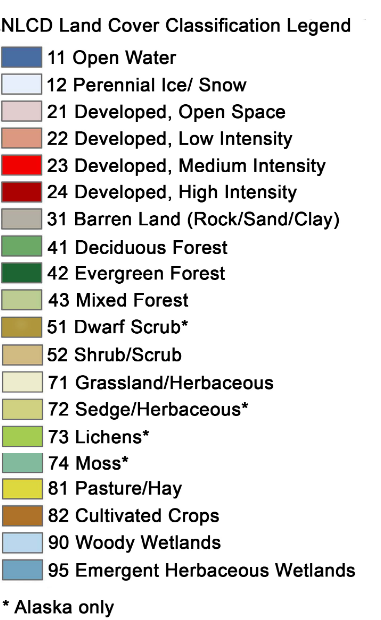

In [69]:
nlcd = ee.Image('USGS/NLCD/NLCD2016')\
    .select('landcover')\
    .clip(image.geometry())

Map.addLayer(nlcd, {}, 'NLCD')
Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

In [70]:
# Make the training dataset
points = nlcd.sample(
    **{
        'region': image.geometry(),
        'scale': 30,
        'numPixels': 100000,
        'seed': 0,
        'geometries': True, # Set this to False to ignore geometries
    }
)

Map.addLayer(points, {}, 'training', False)

### Train the classifier and classify the image

In [71]:
# Use these bands for prediction
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# This property of the table stores the land cover labels
label = 'landcover'

# Overlay the points on the imagery to get training
training = image.select(bands).sampleRegions(
    **{
        'collection': points,
        'properties': [label],
        'scale': 30
    }
)

# Train a CART classifier with default parameters
trained = ee.Classifier.smileCart().train(training, label, bands)
trained

In [72]:
# Classify the image with the same bands used for training
result = image.select(bands).classify(trained)

# Display the clusters with random colors
Map.addLayer(result.randomVisualizer(), {}, 'classified')
Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

### Render categorical map and visualize the results

To render a categorical map, we can set two image properties: `landcover_class_values` and `landcover_class_palette`. We can use the same style as the NLCD so that it is easy to compare the two maps.

In [73]:
class_values = nlcd.get('landcover_class_values').getInfo()
class_values

[11,
 12,
 21,
 22,
 23,
 24,
 31,
 41,
 42,
 43,
 51,
 52,
 71,
 72,
 73,
 74,
 81,
 82,
 90,
 95]

In [74]:
class_palette = nlcd.get('landcover_class_palette').getInfo()
class_palette

['476ba1',
 'd1defa',
 'decaca',
 'd99482',
 'ee0000',
 'ab0000',
 'b3aea3',
 '68ab63',
 '1c6330',
 'b5ca8f',
 'a68c30',
 'ccba7d',
 'e3e3c2',
 'caca78',
 '99c247',
 '78ae94',
 'dcd93d',
 'ab7028',
 'bad9eb',
 '70a3ba']

In [75]:
landcover = result.set('classification_class_values', class_values)
landcover = landcover.set('classification_class_palette', class_palette)
landcover

In [76]:
Map.addLayer(landcover, {}, 'Land Cover')
Map.add_legend(builtin_legend = 'NLCD')
Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

### Export the result

In [77]:
out_file = os.path.join(out_dir, 'landcover.tif')
geemap.ee_export_image(landcover, filename = out_file, scale = 900)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\landcover.tif


## Training sample creation

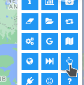

In [78]:
geemap.show_youtube('https://youtu.be/VWh5PxXPZw0')

Output(layout=Layout(width='815px'))

In [79]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## WhiteboxTools

In [80]:
whiteboxgui.show()

In [81]:
whiteboxgui.show(tree = True)

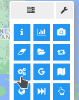

In [82]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Data Export

## Export ee.Image

In [83]:
Map = geemap.Map()

image = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 1)

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [84]:
# Draw any shapes on the map using the Drawing tools before executing this code block
roi = Map.user_roi

if roi is None:
    roi = ee.Geometry.Polygon(
        [
            [
                [-115.413031, 35.889467],
                [-115.413031, 36.543157],
                [-114.034328, 36.543157],
                [-114.034328, 35.889467],
                [-115.413031, 35.889467],
            ]
        ]
    )

roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -115.413031,
              35.889467
            ],
            [
              -115.413031,
              36.543157
            ],
            [
              -114.034328,
              36.543157
            ],
            [
              -114.034328,
              35.889467
            ],
            [
              -115.413031,
              35.889467
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [85]:
filename = os.path.join(out_dir, 'landsat.tif')
image = image.clip(roi).unmask()

# Exporting all bands as one single image
geemap.ee_export_image(
    image, filename = filename, scale = 90, region = roi, file_per_band = False
)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\landsat.tif


In [86]:
# Exporting each band as one image
geemap.ee_export_image(
    image, filename = filename, scale = 90, region = roi, file_per_band = True
)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads


## Export ee.ImageCollection

In [87]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')\
        .filterBounds(loc)\
        .filterDate('2008-01-01', '2020-01-01')\
        .filter(ee.Filter.listContains('system:band_names', 'N'))
)
collection

Name,Description
R,Red
G,Green
B,Blue
N,Near infrared


In [88]:
collection.aggregate_array('system:index').getInfo()

['m_4609915_sw_14_060_20180902_20181213',
 'm_4609915_sw_14_060_20190626',
 'm_4609915_sw_14_1_20090818',
 'm_4609915_sw_14_1_20100629',
 'm_4609915_sw_14_1_20120714',
 'm_4609915_sw_14_1_20140901',
 'm_4609915_sw_14_1_20150926',
 'm_4609915_sw_14_h_20160704',
 'm_4609915_sw_14_h_20170703']

In [89]:
geemap.ee_export_image_collection(collection, out_dir = out_dir)

Total number of images: 9

Exporting 1/9: C:\Users\gilramolete/Downloads\m_4609915_sw_14_060_20180902_20181213.tif
Generating URL ...
An error occurred while downloading.
Total request size (822703200 bytes) must be less than or equal to 50331648 bytes.


Exporting 2/9: C:\Users\gilramolete/Downloads\m_4609915_sw_14_060_20190626.tif
Generating URL ...
An error occurred while downloading.
Total request size (849205448 bytes) must be less than or equal to 50331648 bytes.


Exporting 3/9: C:\Users\gilramolete/Downloads\m_4609915_sw_14_1_20090818.tif
Generating URL ...
An error occurred while downloading.
Total request size (342797672 bytes) must be less than or equal to 50331648 bytes.


Exporting 4/9: C:\Users\gilramolete/Downloads\m_4609915_sw_14_1_20100629.tif
Generating URL ...
An error occurred while downloading.
Total request size (330117216 bytes) must be less than or equal to 50331648 bytes.


Exporting 5/9: C:\Users\gilramolete/Downloads\m_4609915_sw_14_1_20120714.tif
Generating 

## Export pixels as a numpy array

In [91]:
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region = aoi)
print(rgb_img.shape)

(373, 531, 3)


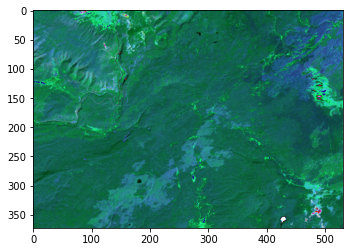

In [93]:
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

## Export pixel values to points

In [94]:
Map = geemap.Map()

# Add EE dataset
dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add Earth Engine layers to Map
Map.addLayer(
    landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200}, 'Landsat 7'
)
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [95]:
# Download sample data
work_dir = os.path.expanduser('~/Downloads')
in_shp = os.path.join(work_dir, 'us_cities.shp')

if not os.path.exists(in_shp):
    data_url = 'https://github.com/giswqs/data/raw/main/us/us_cities.zip'
    geemap.download_from_url(data_url, out_dir = work_dir)

Unzipping us_cities.zip ...
Data downloaded to: C:\Users\gilramolete\Downloads\us_cities


In [96]:
in_fc = geemap.shp_to_ee(in_shp)
Map.addLayer(in_fc, {}, 'Cities')
Map

No module named 'pycrs'


Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [100]:
# # Export pixels as a shapefile
# out_shp = os.path.join(work_dir, 'dem.shp')
# geemap.extract_values_to_points(in_fc, dem, out_shp)

In [101]:
# # Export pixel values as a csv
# out_csv = os.path.join(work_dir, 'landsat.csv')
# geemap.extract_values_to_points(in_fc, landsat7, out_csv)

## Export ee.FeatureCollection

In [102]:
Map = geemap.Map()

fc = ee.FeatureCollection('users/giswqs/public/countries')
Map.addLayer(fc, {}, "Countries")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [103]:
out_shp = os.path.join(out_dir, 'countries.shp')
geemap.ee_to_shp(fc, filename = out_shp)

Using format GEOPANDAS_GEODATAFRAME requires geopandas.


In [104]:
out_csv = os.path.join(out_dir, 'countries.csv')
geemap.ee_export_vector(fc, filename = out_csv)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\countries.csv


In [105]:
out_kml = os.path.join(out_dir, 'countries.kml')
geemap.ee_export_vector(fc, filename = out_kml)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\gilramolete\Downloads\countries.kml


In [106]:
countries = pd.read_csv(r'C:/Users/gilramolete/Downloads/countries.csv')
countries

,GDP_MD_EST,ISO_A2,POP_RANK,ISO_A3,CONTINENT,POP_EST,INCOME_GRP,SUBREGION,system:index,NAME
0,25810.0,TJ,13,TJK,Asia,8468555,5. Low income,Central Asia,00000000000000000068,Tajikistan
1,21010.0,KG,13,KGZ,Asia,5789122,5. Low income,Central Asia,00000000000000000069,Kyrgyzstan
2,40000.0,KP,15,PRK,Asia,25248140,5. Low income,Eastern Asia,0000000000000000005f,North Korea
3,628400.0,BD,17,BGD,Asia,157826578,5. Low income,Southern Asia,00000000000000000063,Bangladesh
4,71520.0,NP,15,NPL,Asia,29384297,5. Low income,Southern Asia,00000000000000000065,Nepal
...,...,...,...,...,...,...,...,...,...,...
171,182400.0,EC,14,ECU,South America,16290913,3. Upper middle income,South America,0000000000000000002c,Ecuador
172,78350.0,BO,14,BOL,South America,11138234,4. Lower middle income,South America,0000000000000000001e,Bolivia
173,6093.0,GY,11,GUY,South America,737718,4. Lower middle income,South America,00000000000000000029,Guyana
174,64670.0,PY,13,PRY,South America,6943739,4. Lower middle income,South America,0000000000000000009b,Paraguay
